<a href="https://colab.research.google.com/github/anabossler/Ease-of-Doing-Business/blob/master/logregression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
x, y = make_classification(
    n_samples=500,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

NameError: ignored

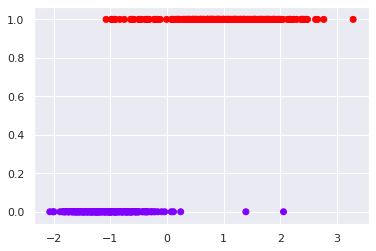

In [0]:
plt.scatter(x, y, c=y, cmap='rainbow')

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

NameError: ignored

In [0]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print(lr.coef_)
print(lr.intercept_)



[[3.42515773]]
[0.82386451]


In [0]:
y_pred = lr.predict(x_test)

In [0]:
confusion_matrix(y_test, y_pred)

array([[61,  1],
       [ 5, 58]])

In [0]:
lr.predict_proba(x_test)

array([[9.79226963e-01, 2.07730367e-02],
       [2.86023382e-03, 9.97139766e-01],
       [4.98576375e-02, 9.50142363e-01],
       [9.95392701e-01, 4.60729879e-03],
       [1.39230507e-03, 9.98607695e-01],
       [6.33625406e-04, 9.99366375e-01],
       [6.85186201e-02, 9.31481380e-01],
       [3.52844414e-02, 9.64715559e-01],
       [8.71923852e-02, 9.12807615e-01],
       [8.98277026e-01, 1.01722974e-01],
       [9.85416108e-01, 1.45838922e-02],
       [5.96362567e-01, 4.03637433e-01],
       [8.41687895e-01, 1.58312105e-01],
       [4.09849855e-03, 9.95901501e-01],
       [7.95154743e-02, 9.20484526e-01],
       [7.30933806e-04, 9.99269066e-01],
       [5.54243322e-03, 9.94457567e-01],
       [1.18313216e-02, 9.88168678e-01],
       [7.83748896e-01, 2.16251104e-01],
       [6.78856085e-04, 9.99321144e-01],
       [7.98803499e-01, 2.01196501e-01],
       [7.87176366e-01, 2.12823634e-01],
       [9.66646532e-01, 3.33534677e-02],
       [1.26545268e-03, 9.98734547e-01],
       [1.262447

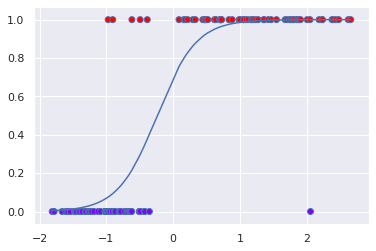

In [0]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')